# 060.SVM (Support Vector Machine)


### data: 성별 소득 data 에 따라 특정 구매자의 구매할지 여부를 예측

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

dataset = pd.read_csv('datasets/Social_Network_Ads.csv')

In [2]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X = dataset.iloc[:, [2,3]].values.astype("float32")
y = dataset.iloc[:, 4].values.astype("float32")

In [4]:
# dataset 을 Training 과 Test set 으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)
print(X_train.shape)

(320, 2)


### Training set 에 대해 Logistic Regression 을 fitting

- rbf (Radial Basis Function) 사용
$$k(x_1, x_2) = exp(-\gamma||x_1 - x_2||^2)$$

In [6]:
classifier = SVC(kernel='rbf')

classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
y_pred = classifier.predict(X_test)

print(y_pred)
print()
print("Test set true counts = ", sum(y_test))
print("predicted true counts = ", sum(y_pred))
print("accuracy = {:.2f}".format(sum(y_pred == y_test) / len(y_test)))

[0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 1.]

Test set true counts =  22.0
predicted true counts =  24.0
accuracy = 0.95


## confusion matrix 를 이용한 model 평가

confution matrix
 [[21  1]
 [ 3 55]]


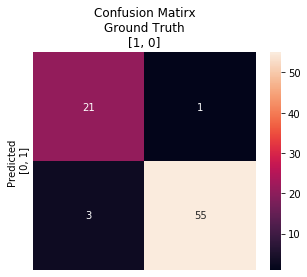

In [8]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import  accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict
import seaborn as sns

cm  = confusion_matrix(y_test, y_pred, labels=[1, 0])

print("confution matrix\n", cm)

plt.figure(figsize=(5,4))

ax = sns.heatmap(cm, annot=True, fmt='d', xticklabels=False, yticklabels=False)
ax.set_ylabel('Predicted\n [0, 1]')
ax.set_title('Confusion Matirx\nGround Truth\n[1, 0]')
None

In [9]:
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred, labels=[1, 0])))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred, labels=[1, 0])))
print("f1 score\n", f1_score(y_test, y_pred))

Accuracy: 0.95
Precision: 0.88
Recall: 0.95
f1 score
 0.9130434782608695
